# **Diabetic Prediction**

---



Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("diabetes.csv")

Analysing the dataset

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


**Preprocessing the data**

In [ ]:
# Replace 0s with NaN in all relevant columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    data[col] = data[col].replace(0, np.nan)

# Impute the NaN values with the median of each column
for col in cols_to_replace:
    data[col] = data[col].fillna(data[col].median())

<Axes: >

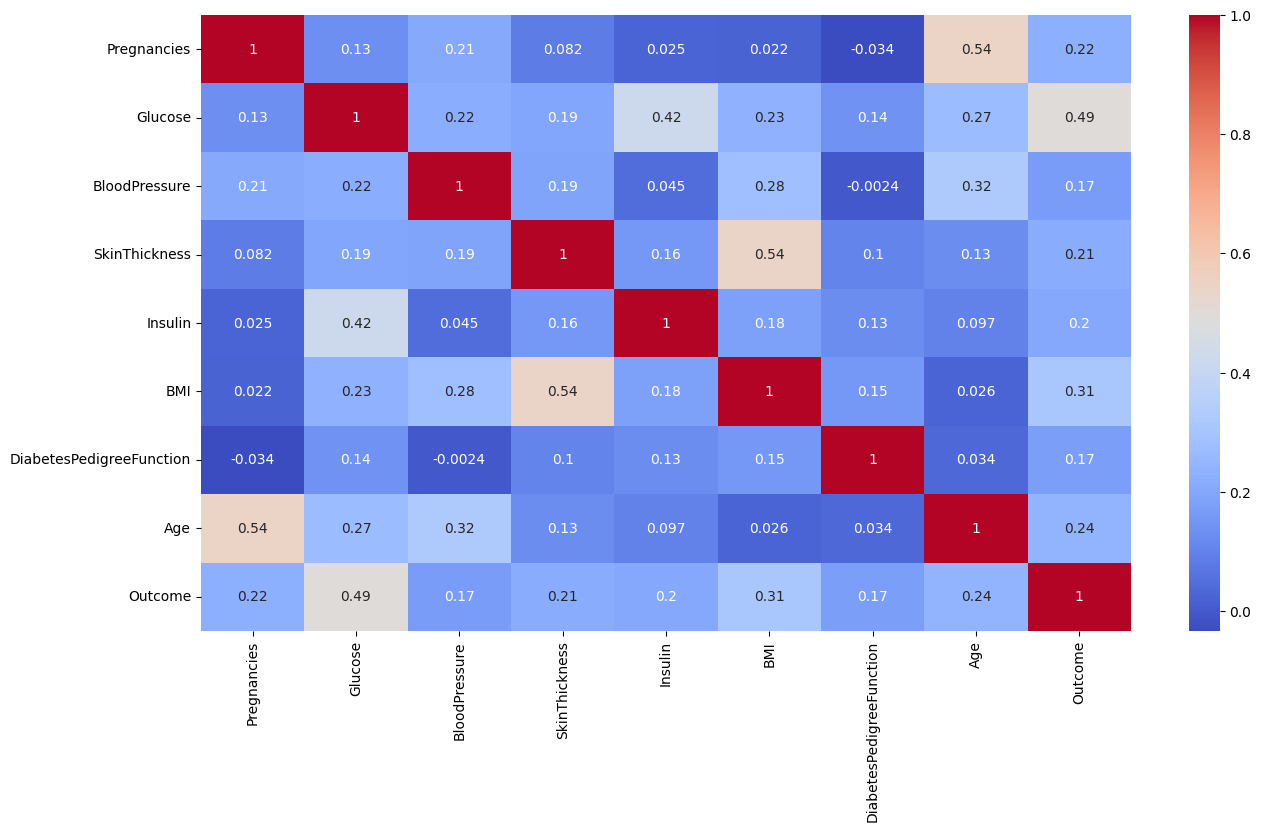

In [ ]:
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
data['BMI_Age'] = data['BMI'] * data['Age']
data['Glucose_Insulin'] = data['Glucose'] / data['Insulin'] + 1

<Axes: >

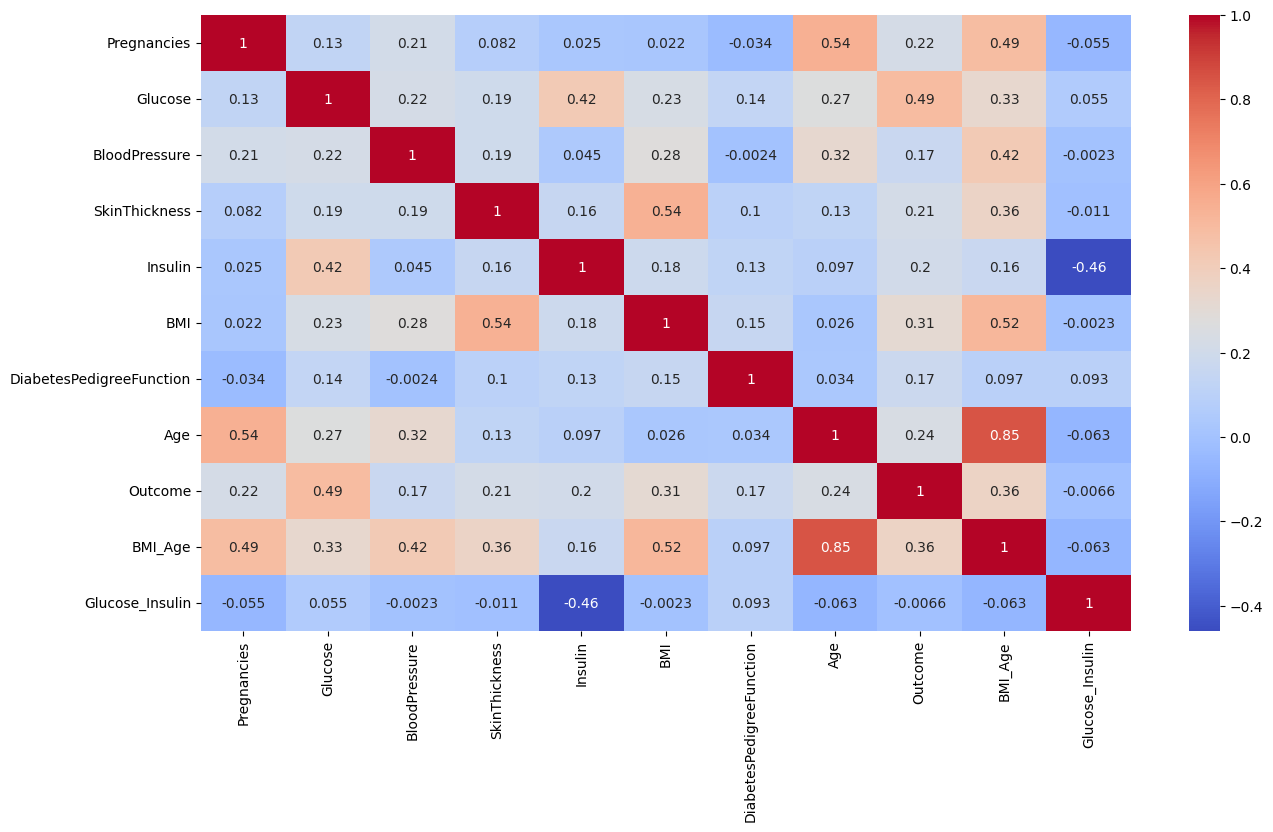

In [ ]:
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
data = data.drop(['Glucose_Insulin'], axis=1)

In [ ]:
data = data.drop(['BloodPressure'], axis=1)

In [ ]:
data = data.drop(['SkinThickness'], axis=1)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age,Glucose_Insulin
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1680.0,2.184000
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,824.6,1.680000
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,745.6,2.464000
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,590.1,1.946809
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1422.3,1.815476


**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**balancing the data**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train_scaled, y_train)